<a href="https://colab.research.google.com/github/Deathridr/PRODIGY_DS_05/blob/main/Task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [158]:
df = pd.concat([ pd.read_csv("/content/accidents_2005_to_2007.csv") ,
                         pd.read_csv("/content/accidents_2009_to_2011.csv"),
                         pd.read_csv("/content/accidents_2012_to_2014.csv")], axis=0, ignore_index=True)


df=df.reset_index(drop=True)
df

<ipython-input-158-ddfde5ba24cc>:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([ pd.read_csv("/content/accidents_2005_to_2007.csv") ,
<ipython-input-158-ddfde5ba24cc>:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv("/content/accidents_2012_to_2014.csv")], axis=0, ignore_index=True)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [159]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [160]:
df.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
1504145,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014
1504149,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,24/12/2014,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

In [163]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.504049e+06,1.504049e+06,1.504049e+06,1.504049e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,0.0,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,4.396214e+05,3.001584e+05,-1.436625e+00,5.258940e+01,3.020536e+01,2.838190e+00,1.831606e+00,1.350960e+00,4.118607e+00,3.476149e+02,4.087999e+00,1.009919e+03,3.900540e+01,NaN,2.675084e+00,3.815684e+02,1.353871e+00,2.009370e+03
std,9.511616e+04,1.610084e+05,1.398078e+00,1.449889e+00,2.551603e+01,4.018423e-01,7.147586e-01,8.253345e-01,1.924405e+00,2.594292e+02,1.428936e+00,1.823518e+03,1.413993e+01,NaN,3.205539e+00,1.302555e+03,4.783534e-01,3.013497e+00
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,NaN,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,3.750600e+05,1.782600e+05,-2.373902e+00,5.149016e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.100000e+02,3.000000e+00,0.000000e+00,3.000000e+01,NaN,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,4.399600e+05,2.688300e+05,-1.403714e+00,5.230913e+01,3.000000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.220000e+02,4.000000e+00,1.290000e+02,3.000000e+01,NaN,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,5.230600e+05,3.981510e+05,-2.215100e-01,5.347858e+01,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.180000e+02,6.000000e+00,7.250000e+02,5.000000e+01,NaN,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,NaN,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


In [164]:
for i in ["Accident_Index",["Longitude","Latitude"],"Latitude","Longitude","Date","Time",["Date","Time"],["Date","Time","Latitude","Longitude"]]:
    print(i,' ',len(df.drop_duplicates(subset=i)))

print(len(df))

Accident_Index   927387
['Longitude', 'Latitude']   1234369
Latitude   1001149
Longitude   1059047
Date   3286
Time   1440
['Date', 'Time']   914334
['Date', 'Time', 'Latitude', 'Longitude']   1469911
1504150


In [165]:
def coefficient_of_variation(df):
    cv = pd.DataFrame(columns=['column_name', 'coefficient_of_variation'])
    for col in df.columns:
        if df[col].dtype != 'object':  # only calculate for numerical columns
            col_cv = df[col].std() / df[col].mean()  # calculate coefficient of variation
            cv = cv.append({'column_name': col, 'coefficient_of_variation': col_cv},
                           ignore_index=True)  # add to results dataframe
    return cv

print(coefficient_of_variation(df))

                   column_name  coefficient_of_variation
0        Location_Easting_OSGR                  0.216359
1       Location_Northing_OSGR                  0.536411
2                    Longitude                 -0.973168
3                     Latitude                  0.027570
4                 Police_Force                  0.844752
5            Accident_Severity                  0.141584
6           Number_of_Vehicles                  0.390236
7         Number_of_Casualties                  0.610925
8                  Day_of_Week                  0.467247
9   Local_Authority_(District)                  0.746312
10              1st_Road_Class                  0.349544
11             1st_Road_Number                  1.805608
12                 Speed_limit                  0.362512
13             Junction_Detail                       NaN
14              2nd_Road_Class                  1.198295
15             2nd_Road_Number                  3.413686
16         Urban_or_Rural_Area 

In [166]:
print(df.isna().sum())
print(" ")
print(len(df))

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [167]:
def clean_pipineline(df):
    df = remove_dup(df)
    print("Number of rows : ", len(df))
    df=drop_column(df,["LSOA_of_Accident_Location",'Location_Easting_OSGR','Location_Northing_OSGR','Did_Police_Officer_Attend_Scene_of_Accident','LSOA_of_Accident_Location'])
    print("Number of rows : ", len(df))
    df=drop_drow(df)
    print("Number of rows : ", len(df))
    return df

def remove_dup(df):
    return df.drop_duplicates(subset=['Date','Time','Longitude','Latitude'], keep='first')

def drop_drow(df):
    return df.dropna(subset=["Time","Pedestrian_Crossing-Human_Control","Pedestrian_Crossing-Physical_Facilities","Weather_Conditions","Special_Conditions_at_Site","Carriageway_Hazards","Latitude","Longitude"])

def drop_column(df,columns):
    return df.drop(columns,axis=1)


In [168]:
df=clean_pipineline(df)

Number of rows :  1469911
Number of rows :  1469911
Number of rows :  1469500


In [169]:
print(df.isna().sum())
print(" ")
print(len(df))

Accident_Index                                   0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                             0
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Detail                            1469500
Junction_Control                            591529
2nd_Road_Class                                   0
2nd_Road_Number                

In [170]:
from sklearn.tree import DecisionTreeClassifier


#For more complex columns (Categorical), we'll be filling them with a Decision Tree model
def fill_nulls_with_decision_tree(df, feature_cols, target_col):
    """Fill null values in target column using a decision tree model trained on other columns"""


    train_df = df[df[target_col].notnull()]
    test_df = df[df[target_col].isnull()]


    model = DecisionTreeClassifier(random_state=42)

    model.fit(train_df[feature_cols], train_df[target_col])


    imputed_values = model.predict(test_df[feature_cols])


    df.loc[df[target_col].isnull(), target_col] = imputed_values

    return df,model

def dummify(df, columns):
    df_dummified = pd.get_dummies(df, columns=columns)
    return df_dummified

def undummify(df_dummified, column_name):
    column_names = df_dummified.columns.tolist()
    dummy_columns = [col for col in column_names if column_name in col]
    df_undummified = df_dummified.copy()
    df_undummified[column_name] = df_dummified[dummy_columns].idxmax(axis=1).str.replace(f"^{column_name}_", "")
    df_undummified.drop(dummy_columns, axis=1, inplace=True)
    return df_undummified

def create_temporary_mapper(df, column_name):
    unique_values = df[column_name].unique()
    new_values = range(len(unique_values))
    mapper = dict(zip(unique_values, new_values))
    return mapper

def display_aggregation(df, *columns):
    H = list(columns)
    C= list(columns)
    C.append('Accident_Index')
    print(C)
    print(df[C].groupby(by=H).count().sort_values(by=[H[0]]+["Accident_Index"],ascending=[True,False]).to_string())

In [171]:
df["int-Date"]=df["Date"].apply(lambda x:int(x[3:5]))
df["int-Time"]=df["Time"].apply(lambda x:int(str(x)[0:2]))

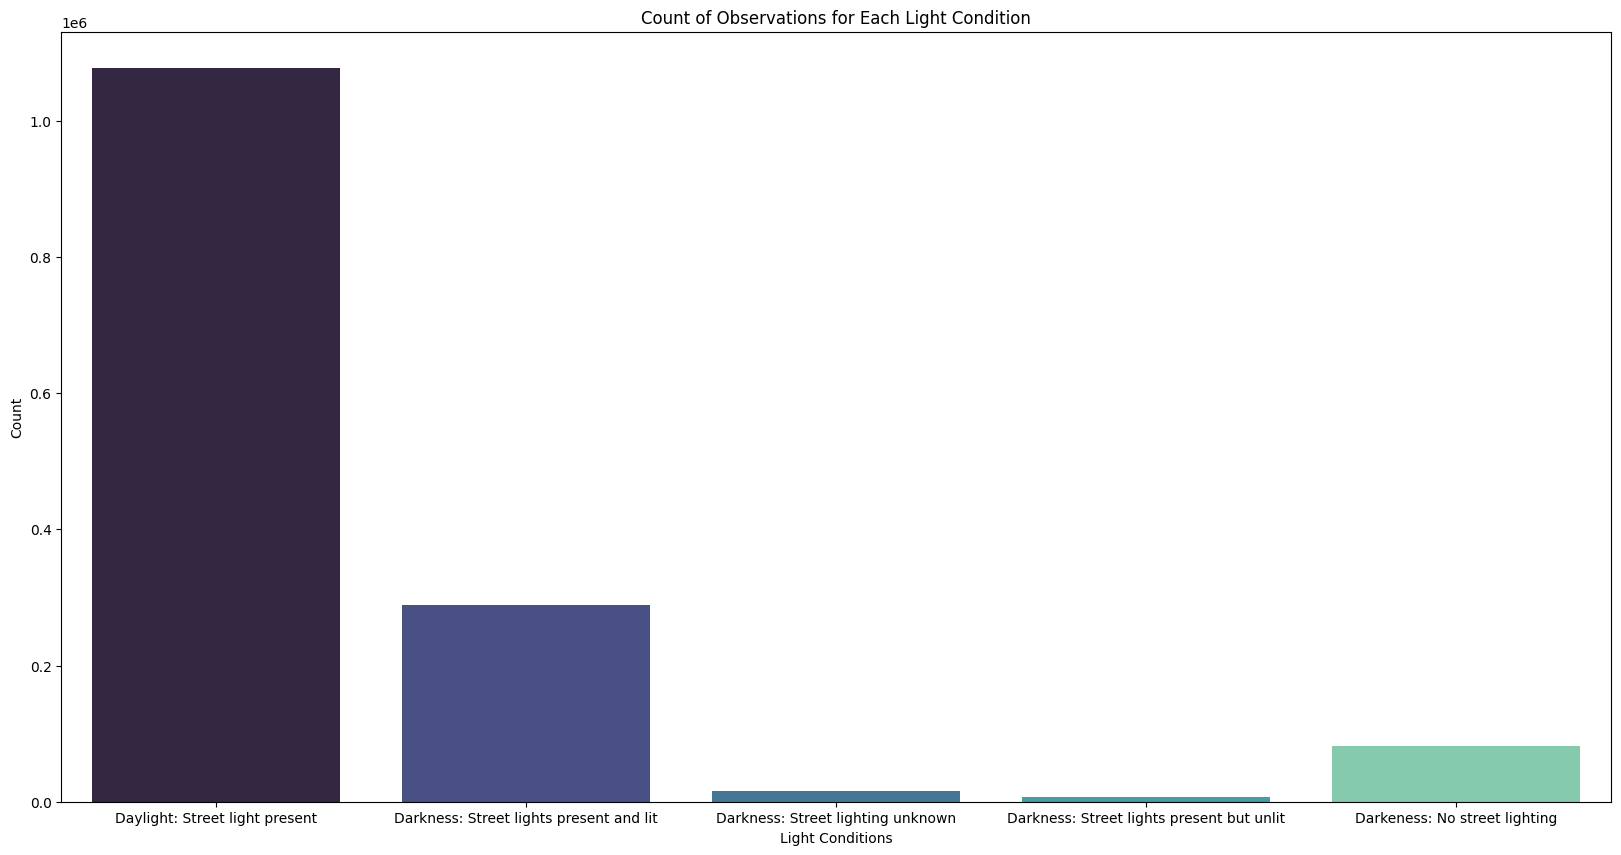

In [172]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x="Light_Conditions", palette = 'mako')

plt.xlabel("Light Conditions")
plt.ylabel("Count")
plt.title("Count of Observations for Each Light Condition")

plt.show()

In [173]:
df["Darkness_Presence"]=df["Light_Conditions"].replace(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'] , [0,1,2,2,2])

In [174]:
df=df.drop(["Light_Conditions"],axis=1)

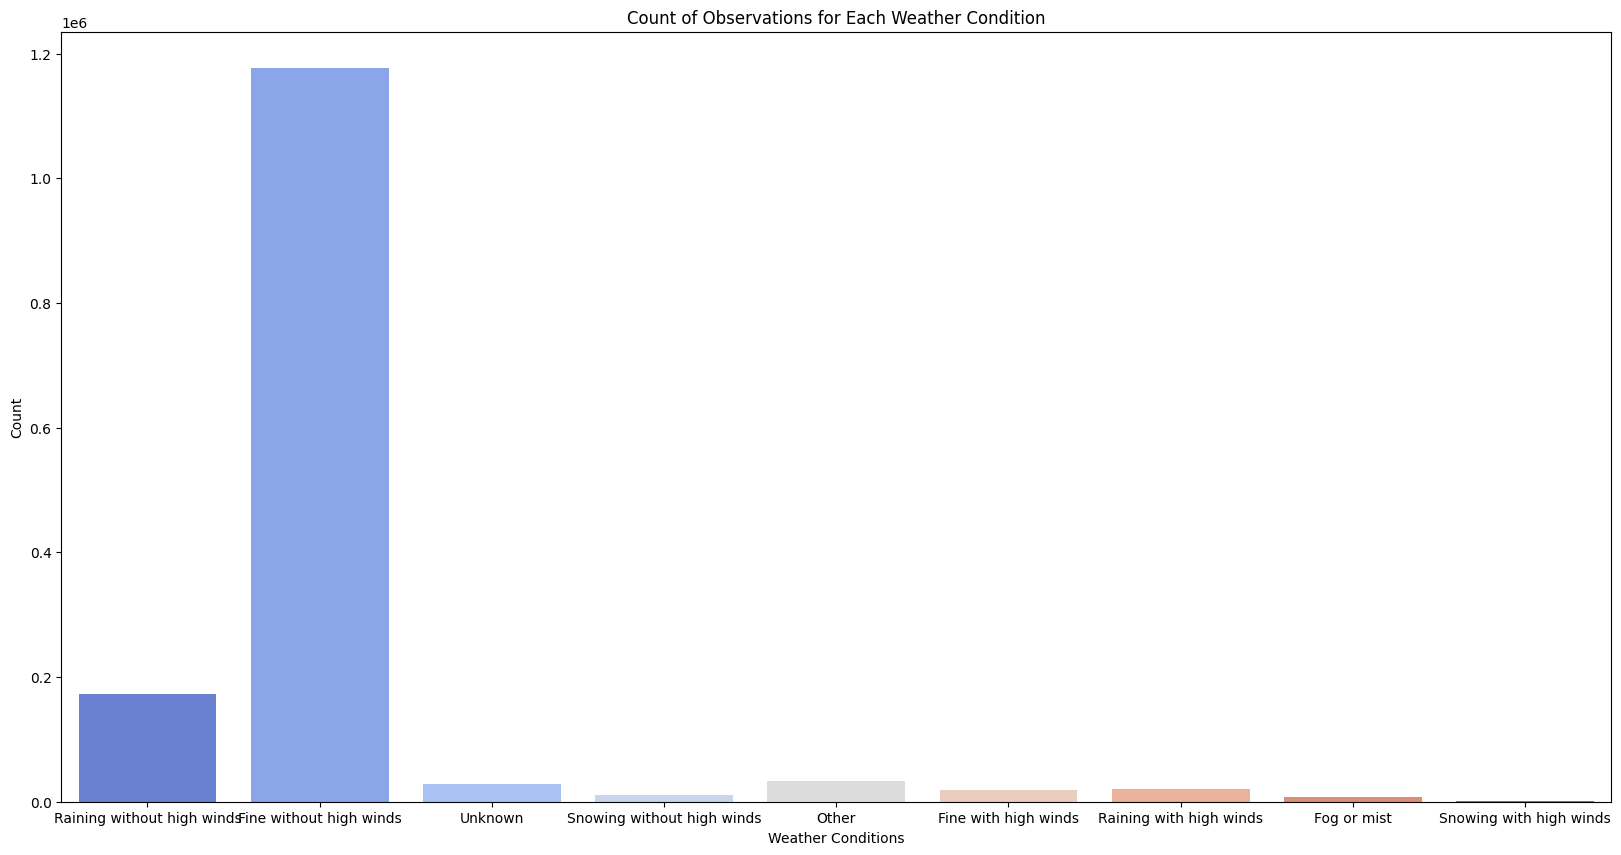

In [175]:
plt.figure(figsize=(20, 10))

color_palette = sns.color_palette("coolwarm", n_colors=len(df["Weather_Conditions"].unique()))

sns.countplot(data=df, x="Weather_Conditions", palette=color_palette)

plt.xlabel("Weather Conditions")
plt.ylabel("Count")
plt.title("Count of Observations for Each Weather Condition")

plt.show()

In [176]:
df["Weather_Conditions"]=df["Weather_Conditions"].replace(['Raining without high winds', 'Fine without high winds',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds'],["No High winds","No High winds","No High winds","No High winds","High winds","High winds","Fog","High winds"])

In [177]:
mapping = {
    "No High winds": 0,
    "High winds": 2,
    "Fog": 0,
    "Unknown":0
}

# Use the replace function to convert the column to ordinal values
df["Weather_Conditions"] = df["Weather_Conditions"].replace(mapping)

In [178]:
display_aggregation(df,"Road_Surface_Conditions")

['Road_Surface_Conditions', 'Accident_Index']
                           Accident_Index
Road_Surface_Conditions                  
Dry                               1011197
Flood (Over 3cm of water)            2066
Frost/Ice                           30631
Snow                                10339
Wet/Damp                           413340


In [179]:
create_temporary_mapper(df,"Road_Surface_Conditions")

{'Wet/Damp': 0,
 'Dry': 1,
 'Frost/Ice': 2,
 'Snow': 3,
 'Flood (Over 3cm of water)': 4,
 nan: 5}

In [180]:
mapping = {
    'Dry': 5,
    'Wet/Damp': 4,
    'Frost/Ice': 3,
    'Snow': 2,
    'Flood (Over 3cm of water)': 1,
    pd.NA:pd.NA
}

df['Road_Surface_Conditions_Ordinal'] = df['Road_Surface_Conditions'].replace(mapping)

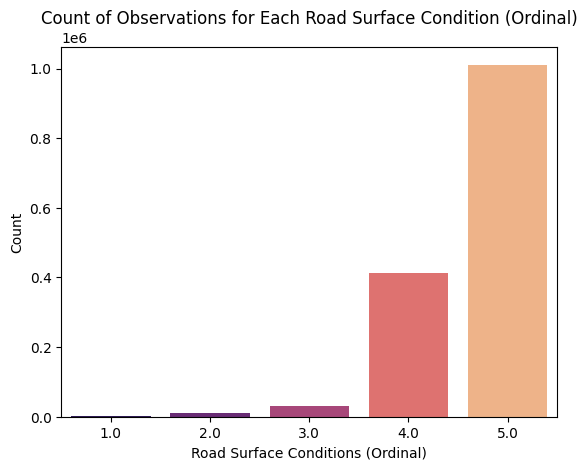

In [181]:
sns.countplot(data=df, x='Road_Surface_Conditions_Ordinal', palette = 'magma')

plt.xlabel("Road Surface Conditions (Ordinal)")
plt.ylabel("Count")
plt.title("Count of Observations for Each Road Surface Condition (Ordinal)")

plt.show()

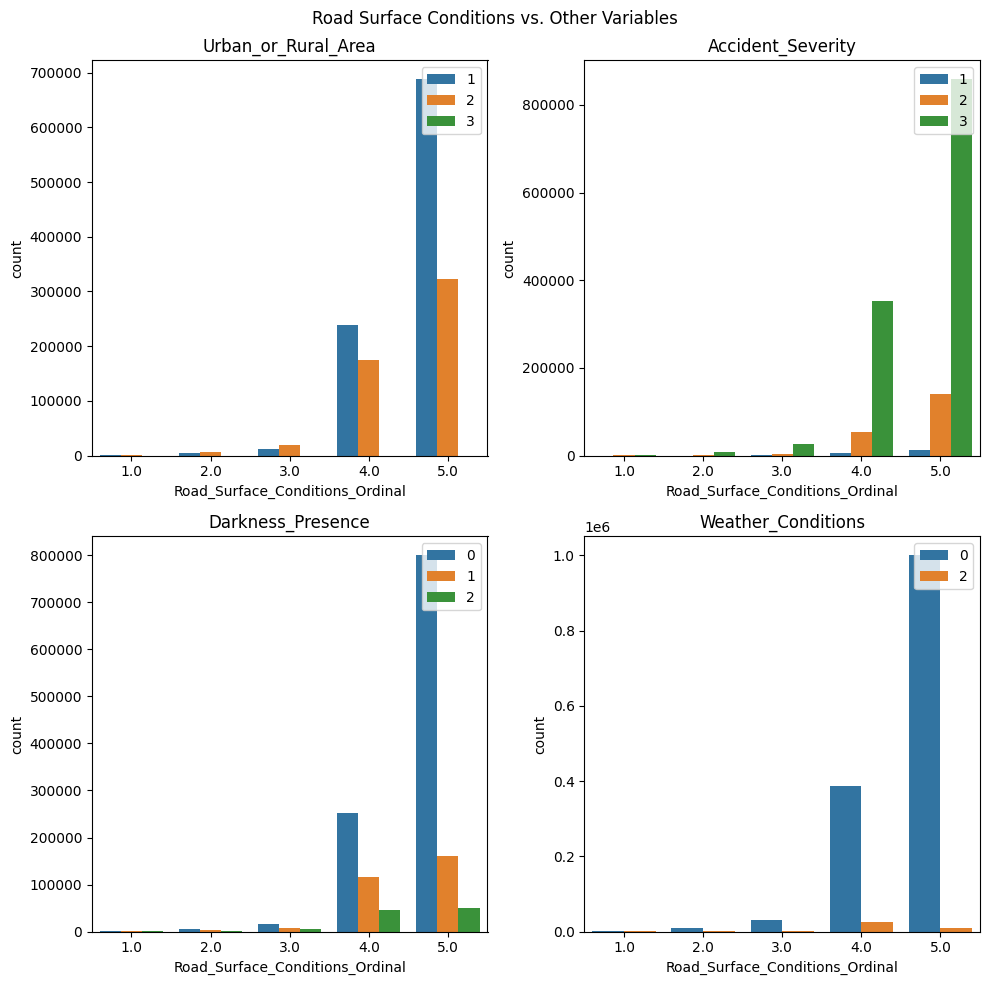

In [182]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
variables = ['Urban_or_Rural_Area', 'Accident_Severity',"Darkness_Presence", 'Weather_Conditions']

# Loop through each variable and plot a countplot on a separate subplot
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.countplot(df, x='Road_Surface_Conditions_Ordinal', hue=var, ax=axs[row, col])
    axs[row, col].set_title(var)
    axs[row, col].legend(loc='upper right')  # move the legend to upper right corner

fig.suptitle('Road Surface Conditions vs. Other Variables')

# Adjust the spacing between subplots to avoid overlapping legends
fig.tight_layout()

plt.show()

In [183]:
print("Number_of_Vehicles")
display_aggregation(df,"Road_Surface_Conditions_Ordinal","Number_of_Vehicles")
print(" ")
print("Number_of_Casualties")
display_aggregation(df,"Road_Surface_Conditions_Ordinal","Number_of_Casualties")

Number_of_Vehicles
['Road_Surface_Conditions_Ordinal', 'Number_of_Vehicles', 'Accident_Index']
                                                    Accident_Index
Road_Surface_Conditions_Ordinal Number_of_Vehicles                
1.0                             1                             1158
                                2                              741
                                3                              115
                                4                               34
                                5                               12
                                6                                3
                                11                               2
                                9                                1
2.0                             2                             5030
                                1                             4305
                                3                              750
                                4 

In [184]:
display_aggregation(df,"Road_Surface_Conditions_Ordinal")

['Road_Surface_Conditions_Ordinal', 'Accident_Index']
                                 Accident_Index
Road_Surface_Conditions_Ordinal                
1.0                                        2066
2.0                                       10339
3.0                                       30631
4.0                                      413340
5.0                                     1011197


In [185]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

def fill_nulls_with_decision_tree(df, features, target):
    # Check if the DataFrame is empty
    if df.empty:
        raise ValueError("Input DataFrame is empty. Please provide a non-empty DataFrame.")

    # Check if there are null values in the specified features
    if df[features].isnull().any().any():
        # Prepare the data for training the DecisionTreeClassifier
        train_data = df.dropna(subset=features + [target])

        # Separate the features and target variable
        X = train_data[features]
        y = train_data[target]

        # Initialize the DecisionTreeClassifier
        clf = DecisionTreeClassifier()

        # Fit the model
        clf.fit(X, y)

        # Use the trained model to predict missing values
        missing_data = df[df[features].isnull().any(axis=1)]
        X_missing = missing_data[features]
        predicted_values = clf.predict(X_missing)

        # Fill the missing values in the DataFrame
        df.loc[df[features].isnull().any(axis=1), features] = predicted_values

        return df, clf

    else:
        print("No null values found in the specified features.")
        return df, None

# Example usage
df_cleaned, clf = fill_nulls_with_decision_tree(df, ['Urban_or_Rural_Area', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Weather_Conditions'], 'Road_Surface_Conditions_Ordinal')


No null values found in the specified features.


In [186]:
df_cleaned,clf = fill_nulls_with_decision_tree(df, ['Urban_or_Rural_Area', 'Accident_Severity',"Number_of_Vehicles","Number_of_Casualties", 'Weather_Conditions'],'Road_Surface_Conditions_Ordinal')

No null values found in the specified features.


In [187]:
df_cleaned['Road_Surface_Conditions']=df_cleaned['Road_Surface_Conditions_Ordinal']

In [188]:
df_cleaned=df_cleaned.drop(['Road_Surface_Conditions'],axis=1)

In [189]:
display_aggregation(df,"Junction_Control")

['Junction_Control', 'Accident_Index']
                          Accident_Index
Junction_Control                        
Authorised person                   2421
Automatic traffic signal          150968
Giveway or uncontrolled           715572
Stop Sign                           9010


In [190]:
df_cleaned["Junction_Control"]=df_cleaned["Junction_Control"].replace([pd.NA],["No Junction"])

In [191]:
df_cleaned=df_cleaned.drop(['Junction_Detail'],axis=1)

<Axes: xlabel='Number_of_Vehicles', ylabel='Number_of_Casualties'>

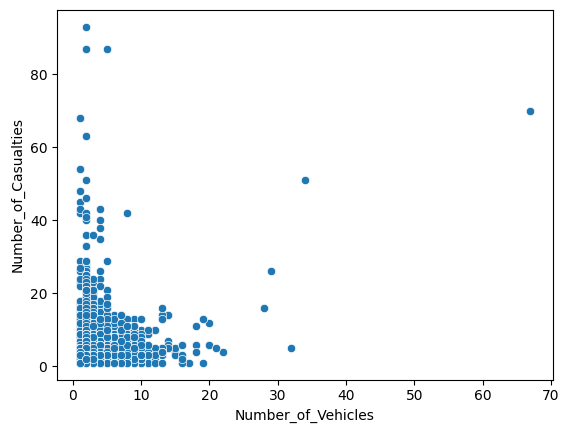

In [192]:
sns.scatterplot(df_cleaned,x="Number_of_Vehicles",y="Number_of_Casualties")

<Axes: >

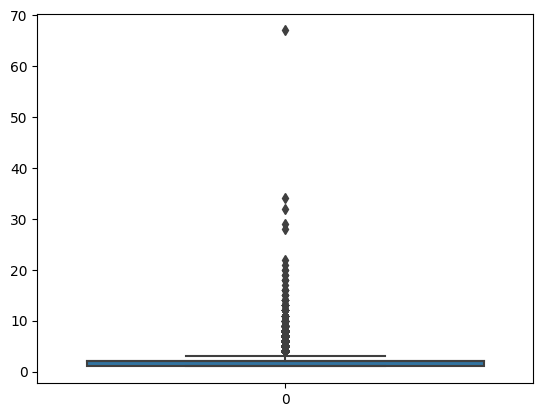

In [193]:
sns.boxplot(df_cleaned["Number_of_Vehicles"])

<Axes: >

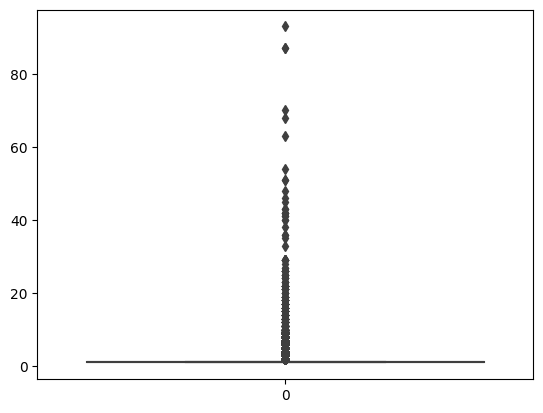

In [194]:
sns.boxplot(df_cleaned["Number_of_Casualties"])

In [196]:
df_cleaned=df_cleaned[(df_cleaned["Number_of_Vehicles"]<25)&(df_cleaned["Number_of_Casualties"]<50)]

<ipython-input-199-f4ba850f5803>:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle((0, 0), 0.6, color='white', edgecolor='black', linewidth=0.8)


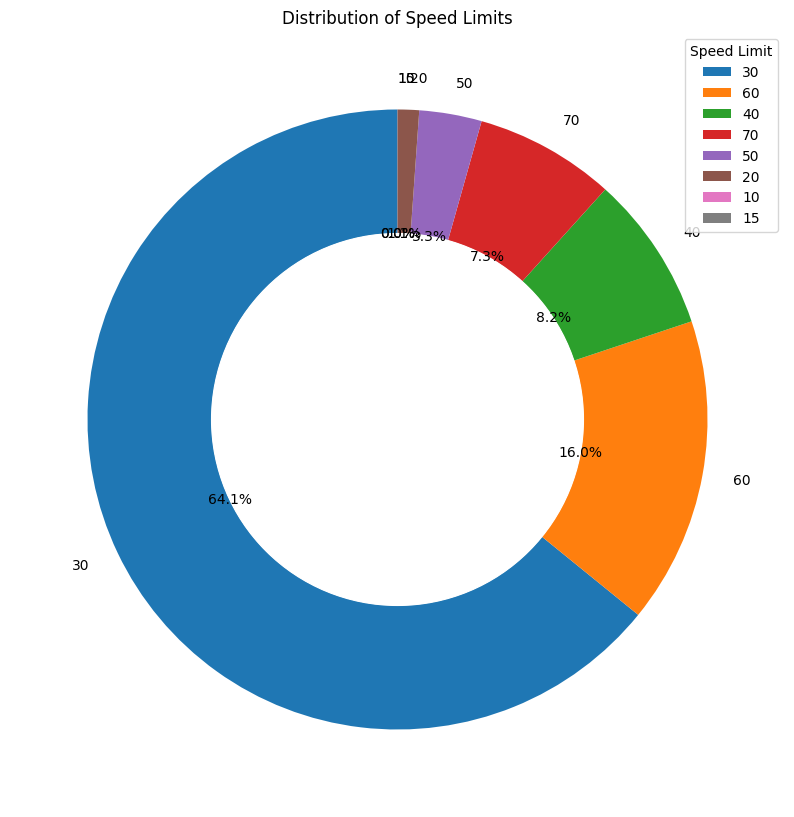

In [199]:
plt.figure(figsize=(10, 11))

# Data for the pie chart
data = df_cleaned.Speed_limit.value_counts()
labels = data.index

# Draw the pie chart with a white circle in the center to create a doughnut
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

# Draw a white circle in the center
centre_circle = plt.Circle((0, 0), 0.6, color='white', edgecolor='black', linewidth=0.8)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Speed Limits")
plt.legend(title="Speed Limit")
plt.show()

<Axes: xlabel='Pedestrian_Crossing-Human_Control', ylabel='count'>

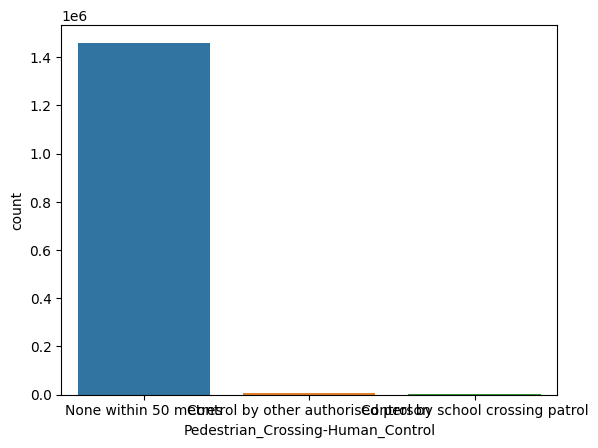

In [198]:
sns.countplot(df_cleaned,x="Pedestrian_Crossing-Human_Control")

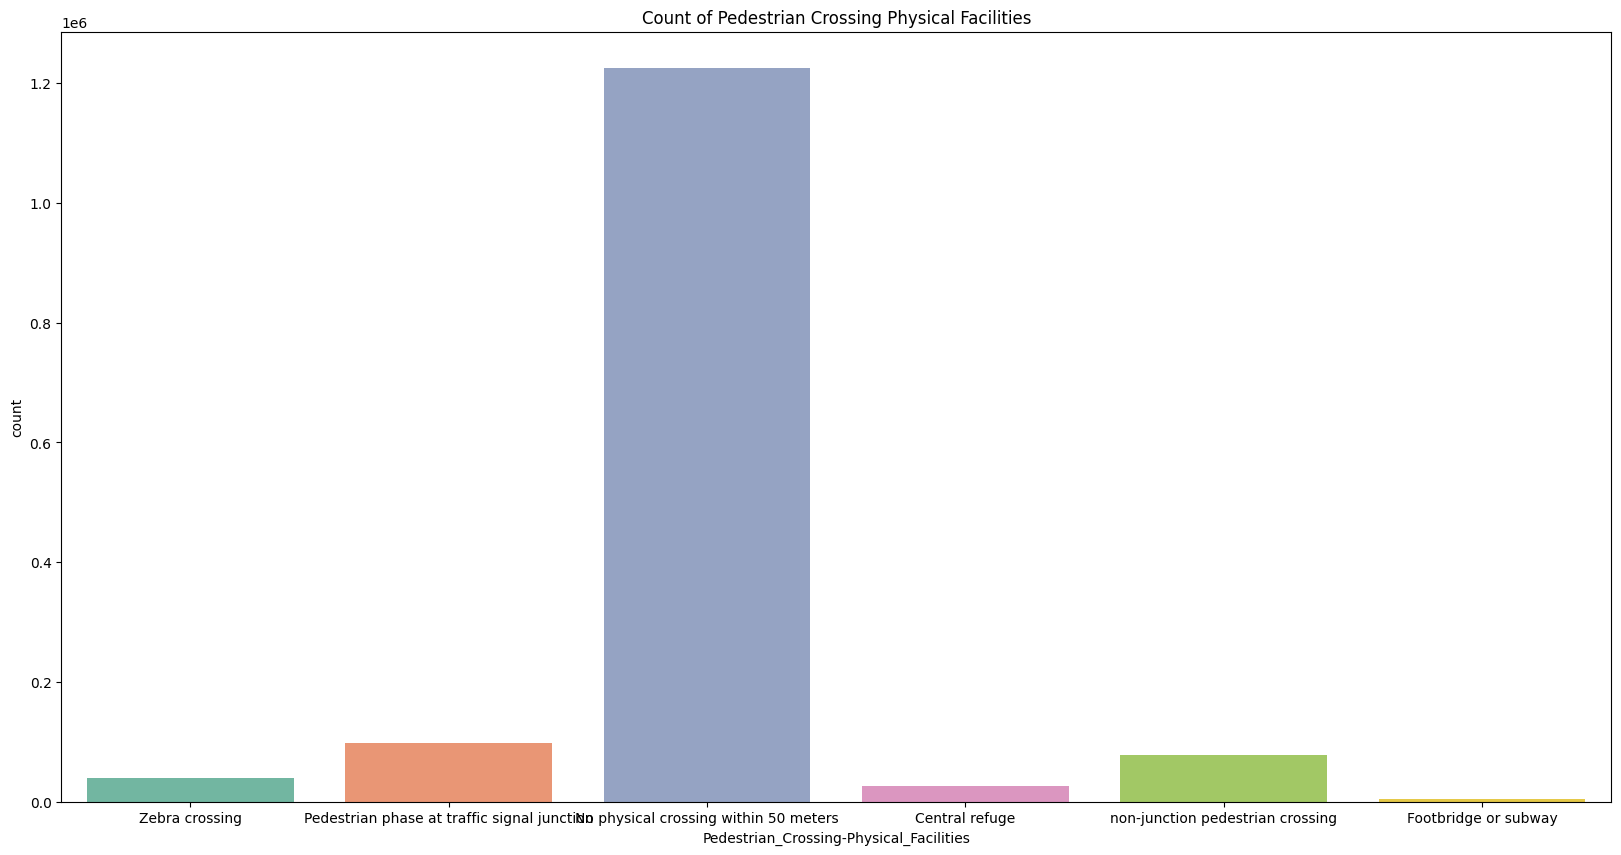

In [200]:
plt.figure(figsize=(20, 10))

# Specify a color palette, for example, 'Set2'
sns.set_palette("Set2")

# Use sns.countplot with x parameter
sns.countplot(data=df_cleaned, x='Pedestrian_Crossing-Physical_Facilities')

plt.title("Count of Pedestrian Crossing Physical Facilities")
plt.show()

In [201]:
df_cleaned.groupby(by="Pedestrian_Crossing-Human_Control").size()

Pedestrian_Crossing-Human_Control
Control by other authorised person       5094
Control by school crossing patrol        3550
None within 50 metres                 1460844
dtype: int64

In [202]:
df_cleaned=df_cleaned.drop(["Pedestrian_Crossing-Human_Control",'Pedestrian_Crossing-Physical_Facilities'],axis=1)

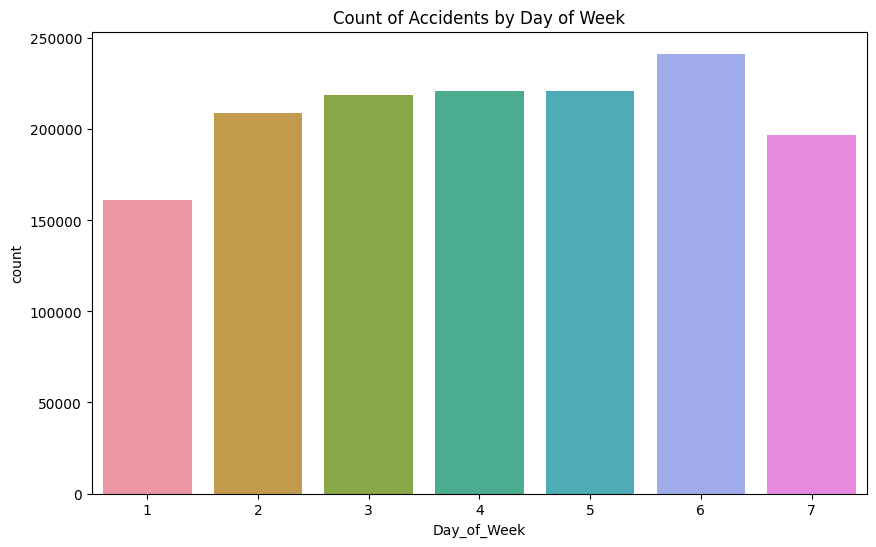

In [203]:
sns.set_palette("mako")

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x="Day_of_Week")

plt.title("Count of Accidents by Day of Week")
plt.show()

In [204]:
display_aggregation(df_cleaned,"Day_of_Week","Accident_Severity")

['Day_of_Week', 'Accident_Severity', 'Accident_Index']
                               Accident_Index
Day_of_Week Accident_Severity                
1           3                          132356
            2                           25887
            1                            3019
2           3                          179422
            2                           26880
            1                            2485
3           3                          188574
            2                           27943
            1                            2447
4           3                          190704
            2                           28010
            1                            2384
5           3                          189634
            2                           28844
            1                            2511
6           3                          206792
            2                           31839
            1                            2885
7           3            

In [205]:
df_cleaned=df_cleaned.drop(["Day_of_Week"],axis=1)

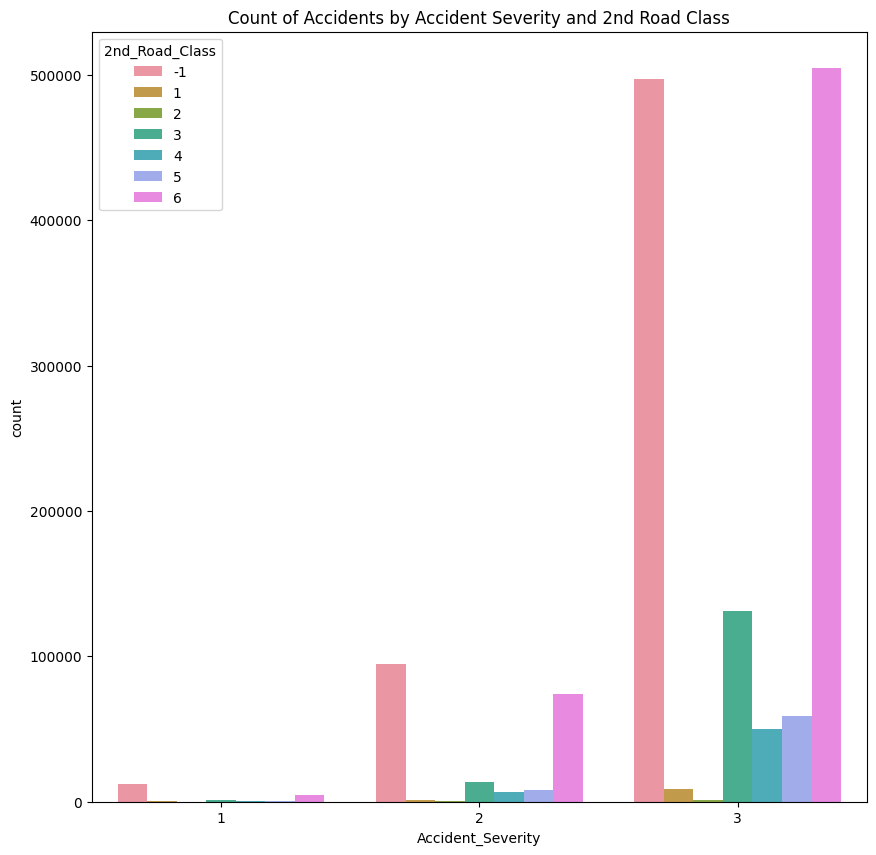

In [206]:
sns.set_palette("viridis")

# Create the countplot with hue
plt.figure(figsize=(10, 10))
sns.countplot(data=df_cleaned, hue='2nd_Road_Class', x='Accident_Severity')

plt.title("Count of Accidents by Accident Severity and 2nd Road Class")
plt.show()

<Axes: xlabel='Accident_Severity', ylabel='count'>

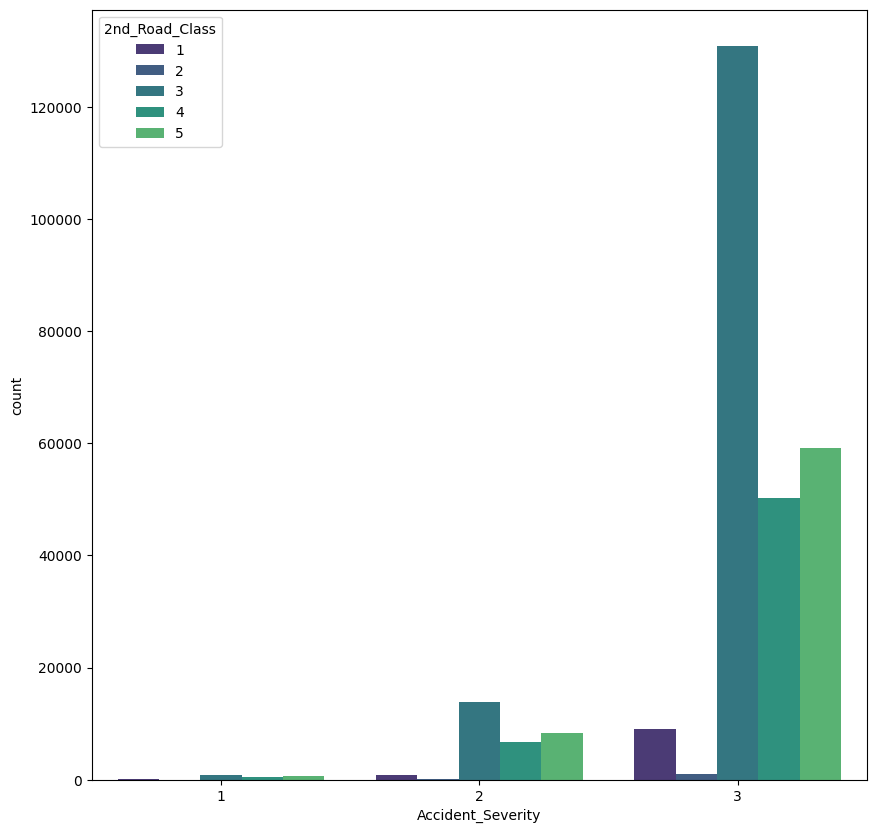

In [207]:
plt.figure(figsize=(10,10))
df_test=df_cleaned[(df_cleaned['2nd_Road_Class'].isin([-1,6]))==False]
sns.countplot(df_test,hue='2nd_Road_Class',x='Accident_Severity')

In [208]:
df_cleaned=df_cleaned.drop(['2nd_Road_Class','2nd_Road_Number'],axis=1)

In [209]:
df_cleaned.groupby(by=["Special_Conditions_at_Site"]).size()

Special_Conditions_at_Site
Auto traffic signal partly defective                   755
Auto traffic singal out                               2740
Mud                                                   4541
None                                               1433588
Ol or diesel                                          5134
Permanent sign or marking defective or obscured       2218
Road surface defective                                3602
Roadworks                                            16910
dtype: int64

<Axes: xlabel='Accident_Severity', ylabel='count'>

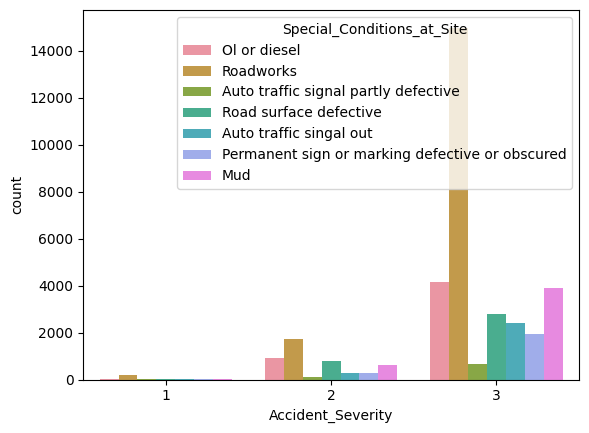

In [210]:
sns.countplot(df_cleaned.loc[df_cleaned["Special_Conditions_at_Site"]!="None"],hue="Special_Conditions_at_Site",x='Accident_Severity')

In [211]:
df_cleaned.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', 'Weather_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Year', 'int-Date', 'int-Time',
       'Darkness_Presence', 'Road_Surface_Conditions_Ordinal'],
      dtype='object')

In [212]:
df_cleaned=df_cleaned.drop(['Local_Authority_(District)',
       'Local_Authority_(Highway)','Carriageway_Hazards','Accident_Index','Police_Force',
       '1st_Road_Number'],axis=1)

In [213]:
df_cleaned['datetime'] = pd.to_datetime(df_cleaned['Date'] + ' ' + df_cleaned['Time'], format='%d/%m/%Y %H:%M')

# convert the datetime column to ISO 8601 format
df_cleaned['datetime'] = df_cleaned['datetime'].dt.strftime('%Y-%m-%dT%H:%M:%S.%fZ')

In [214]:
df_cleaned=df_cleaned.drop(["Date","Time","int-Time","int-Date"],axis=1)

In [215]:
df_cleaned.head()

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,1st_Road_Class,Road_Type,Speed_limit,Junction_Control,Weather_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,Year,Darkness_Presence,Road_Surface_Conditions_Ordinal,datetime
0,-0.191170,51.489096,2,1,1,3,Single carriageway,30,No Junction,0,None,1,2005,0,4.0,2005-01-04T17:42:00.000000Z
1,-0.211708,51.520075,3,1,1,4,Dual carriageway,30,Automatic traffic signal,0,None,1,2005,1,5.0,2005-01-05T17:36:00.000000Z
2,-0.206458,51.525301,3,2,1,5,Single carriageway,30,No Junction,0,None,1,2005,1,5.0,2005-01-06T00:15:00.000000Z
3,-0.173862,51.482442,3,1,1,3,Single carriageway,30,No Junction,0,None,1,2005,0,5.0,2005-01-07T10:35:00.000000Z
4,-0.156618,51.495752,3,1,1,6,Single carriageway,30,No Junction,0,None,1,2005,2,4.0,2005-01-10T21:13:00.000000Z


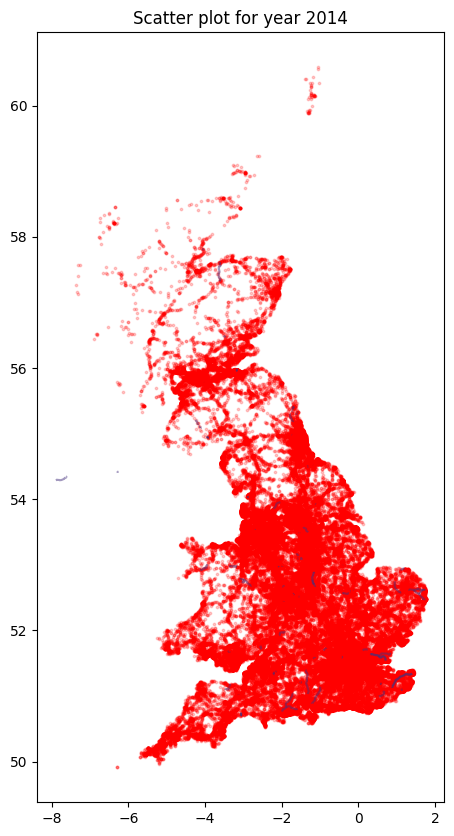

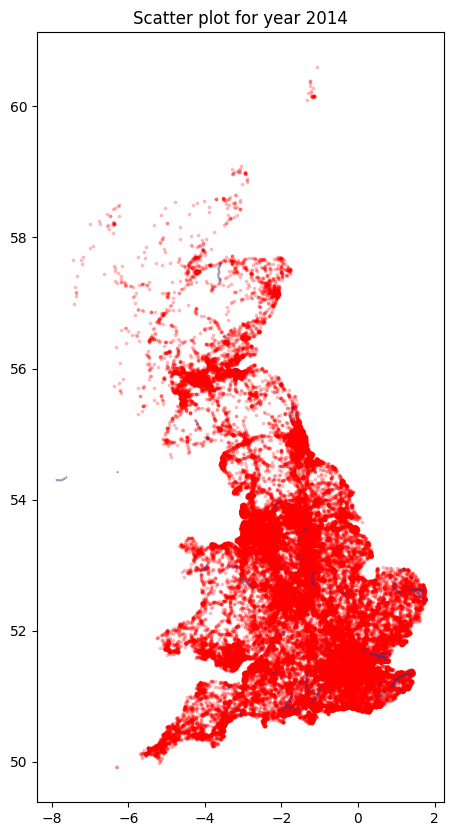

In [247]:
data = df_cleaned[df_cleaned["Year"] == 2005]
fig, ax = plt.subplots(figsize=(10,10))
uk_map.plot(ax=ax, alpha=0.5)
plt.scatter(data["Longitude"], data["Latitude"], alpha=0.2, s=3, c='r')
plt.title(f"Scatter plot for year {year}")
plt.show()

data = df_cleaned[df_cleaned["Year"] == 2014]
fig, ax = plt.subplots(figsize=(10,10))
uk_map.plot(ax=ax, alpha=0.5)
plt.scatter(data["Longitude"], data["Latitude"], alpha=0.2, s=3, c='r')
plt.title(f"Scatter plot for year {year}")
plt.show()